In [1]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

2024-12-12 00:18:16.903161: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 00:18:16.992692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 00:18:17.053797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 00:18:17.071946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 00:18:17.149315: I tensorflow/core/platform/cpu_feature_guar

In [2]:
pwd


'/mnt/c/Users/91940/projects/dl/Deep Learning/Mid_sem'

In [3]:
train_ds=image_dataset_from_directory(
    directory='/mnt/c/Users/91940/projects/dl/Deep Learning/Mid_sem/Fruits Classification/train',labels='inferred',image_size=(150,150),seed=50,label_mode='categorical',batch_size=32

)

Found 9700 files belonging to 5 classes.


I0000 00:00:1733942906.073359  239861 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733942906.604847  239861 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733942906.604894  239861 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733942906.609875  239861 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733942906.609968  239861 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [4]:
valid_ds=image_dataset_from_directory(
    directory='/mnt/c/Users/91940/projects/dl/Deep Learning/Mid_sem/Fruits Classification/valid',
    labels='inferred',
    image_size=(150,150),seed=50,label_mode='categorical',batch_size=32

)

Found 200 files belonging to 5 classes.


In [5]:
test_ds=image_dataset_from_directory(
    directory='/mnt/c/Users/91940/projects/dl/Deep Learning/Mid_sem/Fruits Classification/valid',labels='inferred',image_size=(150,150),seed=50,label_mode='categorical',batch_size=32

)

Found 200 files belonging to 5 classes.


In [36]:
cnn= Sequential(
    [Input(shape=(150,150,3),name='Input_layer'),
     keras.layers.Rescaling(1./255),
    Conv2D(64,kernel_size=(5,5),name='Conv2d_14'),
    keras.layers.BatchNormalization(),
    MaxPooling2D(pool_size=(1,1),strides=(2,2),name='Maxpooling2d_14'),
    Conv2D(32,kernel_size=(3,3),padding='same',name='Conv2D_15'),
    keras.layers.BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),name='MaxPooling2d_15'),
    Flatten(),
    Dense(128,activation='relu',name='desnse_13'),
    keras.layers.BatchNormalization(),
    Dropout(0.2),
    Dense(5,activation='softmax',name='Output_layer')]
)

In [37]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2d_14 (Conv2D)              │ (None, 146, 146, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 146, 146, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpooling2d_14 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_15 (Conv2D)              │ (None, 73, 73, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 73, 73, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2d_15 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ desnse_13 (Dense)               │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,333,413 (20.35 MB)

 Trainable params: 5,332,965 (20.34 MB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
cnn.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
his1=cnn.fit(train_ds,validation_data=valid_ds,epochs=50)

Epoch 1/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3977 - loss: 1.6041 - val_accuracy: 0.4250 - val_loss: 1.3392
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5052 - loss: 1.2345 - val_accuracy: 0.4650 - val_loss: 1.2165
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5683 - loss: 1.0803 - val_accuracy: 0.4600 - val_loss: 1.3481
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6298 - loss: 0.9440 - val_accuracy: 0.4300 - val_loss: 1.4143
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7171 - loss: 0.7712 - val_accuracy: 0.4100 - val_loss: 1.6172
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7657 - loss: 0.6486 - val_accuracy: 0.4650 - val_loss: 1.7041
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7443 - loss: 0.6898 - val_accuracy: 0.4600 - val_loss: 1.6651
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8264 - loss: 0.4979 - val_acc

In [40]:
cnn.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4203 - loss: 3.4382 


[3.2620856761932373, 0.45500001311302185]

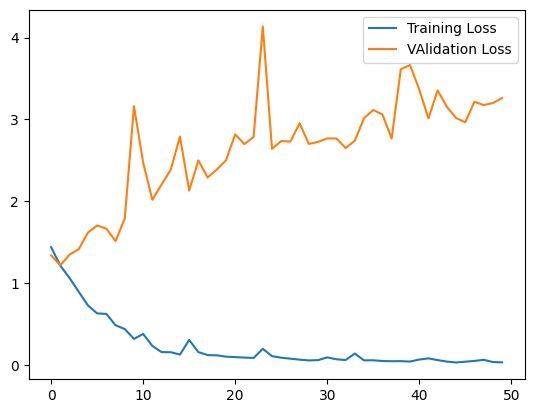

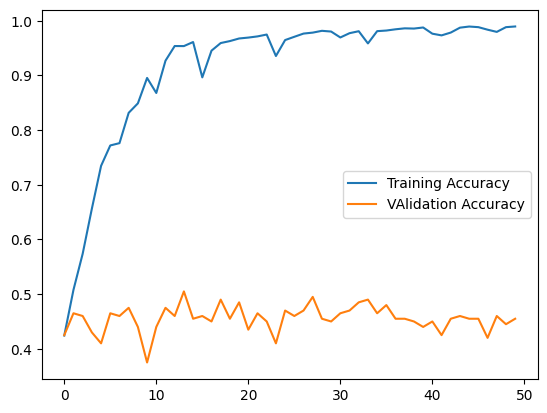

In [41]:
plt.plot(his1.history['loss'],label='Training Loss')
plt.plot(his1.history['val_loss'],label='VAlidation Loss')
plt.legend()
plt.show()

plt.plot(his1.history['accuracy'],label='Training Accuracy')
plt.plot(his1.history['val_accuracy'],label='VAlidation Accuracy')
plt.legend()
plt.show()

In [42]:
y_pred1=cnn.predict(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [43]:
y_pred1

array([[9.53787506e-01, 7.08449193e-07, 6.16891848e-05, 1.57390004e-05,
        4.61343564e-02],
       [1.11846070e-07, 9.94775414e-01, 6.99688244e-05, 2.51853521e-06,
        5.15194284e-03],
       [2.86382099e-04, 5.20707965e-01, 1.31412774e-08, 4.79005635e-01,
        2.38948381e-08],
       [6.03454888e-01, 4.42844019e-08, 7.15195420e-05, 1.56147251e-09,
        3.96473497e-01],
       [1.00239173e-01, 8.56769502e-01, 9.30777052e-04, 3.91336232e-02,
        2.92702182e-03],
       [5.67588831e-05, 2.40144832e-03, 9.97004926e-01, 9.39453386e-08,
        5.36679639e-04],
       [2.24796608e-02, 2.37654356e-04, 6.28857910e-10, 8.62844229e-01,
        1.14438370e-01],
       [1.30807951e-01, 1.96763445e-02, 4.17446842e-07, 8.49511921e-01,
        3.37259689e-06],
       [2.85112299e-04, 2.98117122e-08, 1.20587618e-09, 9.99714792e-01,
        2.66708634e-11],
       [1.00000000e+00, 5.23145503e-12, 4.78455997e-10, 3.46497520e-09,
        1.67523231e-10],
       [5.82292629e-03, 3.8609

In [44]:
y_pred=np.argmax(y_pred1,axis=1)

In [45]:
y_pred

array([0, 1, 1, 0, 1, 2, 3, 3, 3, 0, 2, 4, 4, 2, 0, 2, 4, 0, 0, 1, 0, 3,
       1, 2, 2, 4, 2, 4, 2, 2, 1, 3, 2, 2, 4, 3, 1, 0, 0, 3, 0, 2, 3, 4,
       4, 2, 3, 4, 3, 2, 2, 2, 4, 0, 3, 3, 2, 4, 4, 2, 3, 1, 4, 3, 1, 0,
       3, 3, 4, 1, 3, 2, 4, 3, 1, 3, 3, 0, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 4, 2, 4, 4, 2, 0, 4, 3, 3, 1, 4, 2, 4, 2, 2, 1, 3, 1,
       2, 1, 0, 0, 3, 1, 0, 4, 0, 4, 2, 2, 4, 4, 1, 0, 0, 0, 0, 3, 1, 0,
       0, 2, 4, 1, 0, 3, 3, 1, 3, 4, 2, 3, 3, 3, 4, 1, 4, 2, 4, 3, 4, 2,
       0, 0, 0, 4, 2, 1, 1, 1, 0, 0, 3, 1, 4, 1, 2, 4, 3, 4, 0, 4, 1, 1,
       0, 1, 1, 2, 1, 1, 4, 0, 0, 3, 0, 4, 0, 3, 4, 4, 4, 1, 0, 2, 4, 0,
       0, 4])

In [46]:
y_test=np.concatenate([y for x,y in test_ds],axis=0)
y_true=np.argmax(y_test,axis=1)

2024-12-12 00:36:33.190637: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [47]:
cr= classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        40
           1       0.28      0.28      0.28        40
           2       0.13      0.12      0.13        40
           3       0.26      0.25      0.25        40
           4       0.21      0.23      0.22        40

    accuracy                           0.20       200
   macro avg       0.20      0.21      0.20       200
weighted avg       0.20      0.20      0.20       200



<Axes: >

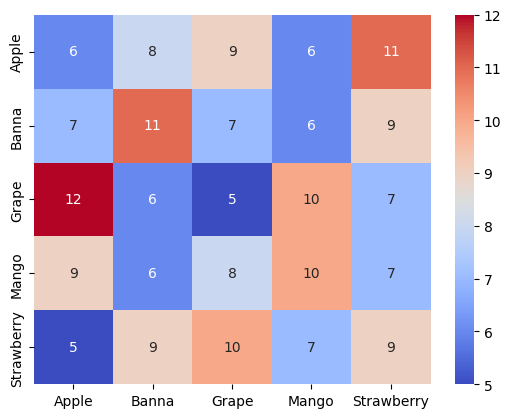

In [48]:
cm= confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='d',xticklabels=['Apple','Banna','Grape','Mango','Strawberry'],yticklabels=['Apple','Banna','Grape','Mango','Strawberry'])

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_ds=ImageDataGenerator(
    horizontal_flip=True,
    rescale=1./255,
    rotation_range=20,
    shear_range=0.1,
)